In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Summary: Accuracy and AUC

In [24]:
import pandas as pd
import numpy as np

# Re-creating the mean performance data from previous context
model_names = ['Logistic Regression', 'SVM', 'XGBoost', 'TabPFN', 'ERMI', 'ERMI (PFN-matched)']
dataset_ids = [
    3, 31, 37, 43, 49, 219, 3902, 3903, 3913, 3917, 3918, 9946, 9952, 
    9957, 9971, 9978, 10093, 10101, 14952, 14965, 146820, 167120, 167141
]

# Assuming 'performance_data' holds the original data as numpy array
performance_data, auc_data = np.load('./benchmark_performance.npy') # Reload the data as the code execution state was reset
mean_performance = {model: {dataset_id: np.mean(performance_data[i, j]) for j, dataset_id in enumerate(dataset_ids)} 
                    for i, model in enumerate(model_names)}
std_performance = {model: {dataset_id: np.std(performance_data[i, j]) for j, dataset_id in enumerate(dataset_ids)} 
                    for i, model in enumerate(model_names)}

mean_auc_performance = {model: {dataset_id: np.mean(auc_data[i, j]) for j, dataset_id in enumerate(dataset_ids)} 
                    for i, model in enumerate(model_names)}
std_auc_performance = {model: {dataset_id: np.std(auc_data[i, j]) for j, dataset_id in enumerate(dataset_ids)} 
                    for i, model in enumerate(model_names)}

# Convert to DataFrame
df_mean_performance = pd.DataFrame(mean_performance, index=dataset_ids)
df_std_performance = pd.DataFrame(std_performance, index=dataset_ids)
# Ranking the models for each dataset
ranked_performance = df_mean_performance.rank(axis=1, ascending=False)

# Convert to DataFrame
df_mean_auc_performance = pd.DataFrame(mean_auc_performance, index=dataset_ids)
df_std_auc_performance = pd.DataFrame(std_auc_performance, index=dataset_ids)
# Ranking the models for each dataset
ranked_auc_performance = df_mean_auc_performance.rank(axis=1, ascending=False)

# # #save
# df_mean_performance.to_csv('mean_performance.csv')
# ranked_performance.to_csv('ranked_performance.csv')
# df_mean_performance.to_csv('mean_auc_performance.csv')
# ranked_performance.to_csv('ranked_auc_performance.csv')

In [25]:
df_mean_performance.drop(columns=['ERMI (PFN-matched)']).rank(axis=1, ascending=False).mean()

Logistic Regression    4.521739
SVM                    2.760870
XGBoost                2.608696
TabPFN                 2.847826
ERMI                   2.260870
dtype: float64

In [26]:
df_mean_performance.drop(columns=['ERMI (PFN-matched)']).rank(axis=1, ascending=False).std()/np.sqrt(df_mean_performance.drop(columns=['ERMI (PFN-matched)']).shape[0]-1)

Logistic Regression    0.211933
SVM                    0.264789
XGBoost                0.297990
TabPFN                 0.265889
ERMI                   0.224689
dtype: float64

In [27]:
df_mean_performance.drop(columns=['ERMI (PFN-matched)']).mean()

Logistic Regression    0.627950
SVM                    0.692888
XGBoost                0.701739
TabPFN                 0.705124
ERMI                   0.709503
dtype: float64

In [28]:
#SEM across datasets
performance_data, auc_data = np.load('./benchmark_performance.npy')
performance_data.reshape((8, -1)).std(1)/np.sqrt(np.prod(performance_data.shape[1:])-1)

array([0.00663189, 0.00616761, 0.0052    , 0.00636192, 0.00542339,
       0.00546992, 0.00540707, 0.00592148])

In [48]:
df_mean_auc_performance.drop(columns=['ERMI (PFN-matched)']).rank(axis=1, ascending=False).mean()

Logistic Regression    2.434783
SVM                    4.478261
XGBoost                3.521739
TabPFN                 1.478261
ERMI                   3.086957
dtype: float64

In [49]:
df_mean_auc_performance.drop(columns=['ERMI (PFN-matched)']).mean()

Logistic Regression    0.772513
SVM                    0.706367
XGBoost                0.757746
TabPFN                 0.790187
ERMI                   0.767491
dtype: float64

In [50]:
df_std_auc_performance.drop(columns=['ERMI (PFN-matched)']).mean()

Logistic Regression    0.057264
SVM                    0.152234
XGBoost                0.067021
TabPFN                 0.056350
ERMI                   0.061160
dtype: float64

In [34]:
performance_data.reshape((8, -1))[3].mean(), performance_data.reshape((8, -1))[4].mean()

(0.7051242236024845, 0.7095031067728996)

In [36]:
# compare t-test comparing means of two samples
sample1=performance_data.reshape((8, -1))[3]
sample2=performance_data.reshape((8, -1))[4]
from scipy import stats
t, p = stats.ttest_ind(sample1, sample2, axis=0)
print('t and p values for t-test: ', t, p)

t and p values for t-test:  -0.523799074435086 0.600544725299874


(array([  7.,  37.,  34.,  37.,  62., 116.,  70.,  45.,  25.,  27.]),
 array([0.37142857, 0.43428571, 0.49714286, 0.56      , 0.62285714,
        0.68571429, 0.74857143, 0.81142857, 0.87428571, 0.93714286,
        1.        ]),
 <BarContainer object of 10 artists>)

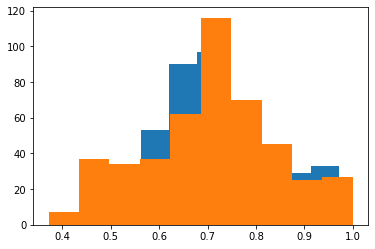

In [39]:
plt.hist(sample2)
plt.hist(sample1)

### Summary Accuracy

In [3]:
import pandas as pd
import numpy as np

# Re-creating the mean performance data from previous context
model_names = ['Logistic Regression', 'SVM', 'XGBoost', 'TabPFN', 'ERMI', 'ERMI (PFN-matched)']
dataset_ids = [
    3, 31, 37, 43, 49, 219, 3902, 3903, 3913, 3917, 3918, 9946, 9952, 
    9957, 9971, 9978, 10093, 10101, 14952, 14965, 146820, 167120, 167141
]

# Assuming 'performance_data' holds the original data as numpy array
performance_data = np.load('./performance.npy') # Reload the data as the code execution state was reset
mean_performance = {model: {dataset_id: np.mean(performance_data[i, j]) for j, dataset_id in enumerate(dataset_ids)} 
                    for i, model in enumerate(model_names)}
std_performance = {model: {dataset_id: np.std(performance_data[i, j]) for j, dataset_id in enumerate(dataset_ids)} 
                    for i, model in enumerate(model_names)}

# Convert to DataFrame
df_mean_performance = pd.DataFrame(mean_performance, index=dataset_ids)
df_std_performance = pd.DataFrame(std_performance, index=dataset_ids)

# Ranking the models for each dataset
ranked_performance = df_mean_performance.rank(axis=1, ascending=False)

# #save
# df_mean_performance.to_csv('mean_performance.csv')
# ranked_performance.to_csv('ranked_performance.csv')

In [4]:
# Displaying the ranked performance for each dataset
ranked_performance.astype(int)  # Converting to integer for easier interpretation

,Logistic Regression,SVM,XGBoost,TabPFN,ERMI,ERMI (PFN-matched)
3,5,2,6,1,3,4
31,1,2,3,6,5,4
37,6,1,5,3,2,4
43,6,4,5,1,2,3
49,6,3,2,4,1,5
219,6,5,1,2,4,3
3902,6,5,1,3,2,4
3903,6,3,1,2,4,5
3913,6,1,3,3,2,5
3917,6,2,1,4,5,3


In [5]:
df_mean_performance

,Logistic Regression,SVM,XGBoost,TabPFN,ERMI,ERMI (PFN-matched)
3,0.825714,0.851429,0.798571,0.866429,0.845000,0.836429
31,0.642143,0.635714,0.635000,0.603571,0.615000,0.622857
37,0.677143,0.707857,0.678571,0.688571,0.695000,0.685714
43,0.540714,0.766429,0.753571,0.799286,0.775714,0.774286
49,0.553571,0.595000,0.607143,0.591429,0.607143,0.582857
219,0.554286,0.600714,0.703571,0.687143,0.643571,0.677143
3902,0.713571,0.752143,0.788571,0.770714,0.771429,0.760714
3903,0.651429,0.726429,0.735714,0.727857,0.710714,0.686429
3913,0.589286,0.731429,0.725714,0.725714,0.725714,0.711429
3917,0.627143,0.670714,0.674286,0.667857,0.652143,0.669286


In [6]:
df_std_performance

,Logistic Regression,SVM,XGBoost,TabPFN,ERMI,ERMI (PFN-matched)
3,0.084829,0.065993,0.075309,0.055379,0.073161,0.071923
31,0.075116,0.087889,0.068880,0.095284,0.078957,0.086118
37,0.069752,0.063322,0.060017,0.055623,0.056834,0.074642
43,0.123988,0.044326,0.058183,0.039506,0.038624,0.056892
49,0.065290,0.076435,0.081504,0.085404,0.056514,0.067401
219,0.060542,0.066773,0.058183,0.073665,0.076195,0.062662
3902,0.080746,0.067200,0.065403,0.065850,0.059074,0.065290
3903,0.101157,0.045237,0.050609,0.048545,0.062576,0.048335
3913,0.117532,0.047509,0.049198,0.064302,0.051230,0.052606
3917,0.089203,0.079086,0.067552,0.075170,0.058077,0.053695


In [9]:
df_std_performance.drop(columns=['ERMI (PFN-matched)']).mean()

Logistic Regression    0.086506
SVM                    0.067020
XGBoost                0.066902
TabPFN                 0.073397
ERMI                   0.059727
dtype: float64

In [15]:
df_mean_performance.drop(columns=['ERMI (PFN-matched)']).rank(axis=1, ascending=False).mean()

Logistic Regression    4.521739
SVM                    2.760870
XGBoost                2.608696
TabPFN                 2.847826
ERMI                   2.260870
dtype: float64

In [16]:
df_mean_performance.drop(columns=['ERMI']).rank(axis=1, ascending=False).mean()

Logistic Regression    4.565217
SVM                    2.673913
XGBoost                2.565217
TabPFN                 2.717391
ERMI (PFN-matched)     2.478261
dtype: float64

### load results

In [4]:
results = np.load('performance.npy')

In [28]:
results.mean(2)

array([[0.82571429, 0.64214286, 0.67714286, 0.54071429, 0.55357143,
        0.55428571, 0.71357143, 0.65142857, 0.58928571, 0.62714286,
        0.53357143, 0.91214286, 0.57928571, 0.57785714, 0.54928571,
        0.66142857, 0.77214286, 0.47142857, 0.79285714, 0.58285714,
        0.51714286, 0.48571429, 0.63214286],
       [0.85142857, 0.63571429, 0.70785714, 0.76642857, 0.595     ,
        0.60071429, 0.75214286, 0.72642857, 0.73142857, 0.67071429,
        0.59642857, 0.92071429, 0.73142857, 0.70142857, 0.63857143,
        0.69071429, 0.92285714, 0.54928571, 0.80714286, 0.56142857,
        0.57357143, 0.47785714, 0.72714286],
       [0.79857143, 0.635     , 0.67857143, 0.75357143, 0.60714286,
        0.70357143, 0.78857143, 0.73571429, 0.72571429, 0.67428571,
        0.65142857, 0.90142857, 0.69785714, 0.685     , 0.62285714,
        0.67071429, 0.84571429, 0.58785714, 0.81571429, 0.73857143,
        0.63928571, 0.50285714, 0.68      ],
       [0.86642857, 0.60357143, 0.68857143, 0.799

No handles with labels found to put in legend.


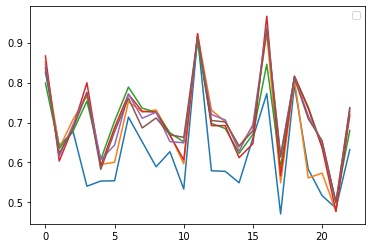

In [27]:
plt.plot(results.mean(2).T)
plt.legend()
plt.show()

### datasets

In [14]:
data = pd.read_csv('data.csv')

In [20]:
data.task_idx.unique().shape

(23,)

In [37]:
data.task_idx.unique()

array([     3,     31,     37,     43,     49,    219,   3902,   3903,
         3913,   3917,   3918,   9946,   9952,   9957,   9971,   9978,
        10093,  10101,  14952,  14965, 146820, 167120, 167141])

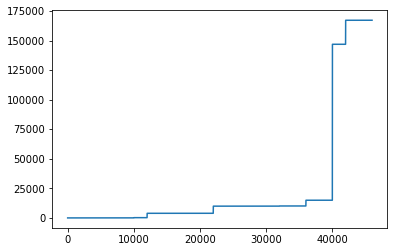

In [39]:
plt.plot(data.task_idx)